In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

def mean_absolute_percentage_error(y_true, y_pred): 
     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
History_Data = pd.read_excel('Competition data.xlsx', sheet_name= 'History Data')

In [34]:
History_Data['Accumulated Day'] = 0

temp_day = 0
def fill_in_DayinWeek (x):
    global temp_day
    if x['Hour'] == 1:
        temp_day = temp_day + 1
    return temp_day
History_Data['Accumulated Day'] = History_Data.apply(fill_in_DayinWeek, axis = 1)
History_Data['Day in Week'] = History_Data['Accumulated Day'] % 7

In [35]:
History_Data

,Year,Month,Day,Hour,T,Load_kW,Accumulated Day,Day in Week
0,2002,1,1,1,36.0,387190.0,1,1
1,2002,1,1,2,35.0,389977.0,1,1
2,2002,1,1,3,34.0,391881.0,1,1
3,2002,1,1,4,32.0,396362.0,1,1
4,2002,1,1,5,33.0,408553.0,1,1
5,2002,1,1,6,32.0,426902.0,1,1
6,2002,1,1,7,31.0,449139.0,1,1
7,2002,1,1,8,32.0,473425.0,1,1
8,2002,1,1,9,36.0,487921.0,1,1
9,2002,1,1,10,40.0,472487.0,1,1


In [36]:
'''import seaborn as sns
sns.set(font_scale=1.)
temp = History_Data[History_Data['T'] >= 0]
ax = sns.distplot(History_Data['T'],bins=100, kde=False)'''

"import seaborn as sns\nsns.set(font_scale=1.)\ntemp = History_Data[History_Data['T'] >= 0]\nax = sns.distplot(History_Data['T'],bins=100, kde=False)"

In [37]:
History_Data['AbsT'] = np.abs(History_Data['T'] - 74.0)

In [38]:
'''train=History_Data.iloc[0:26304,:]
test=History_Data.iloc[26304:,:]'''

'train=History_Data.iloc[0:26304,:]\ntest=History_Data.iloc[26304:,:]'

In [39]:
%%time

for time_in_day in [0,2,4,6,8,10,12,14,16,18,20,22]:
    for day_in_week in [0, 1, 2, 3, 4, 5, 6]:

        tempDF_hour = History_Data.loc[History_Data['Hour'].isin([time_in_day+ 1,time_in_day+ 2]) ,:] 
        tempDF_hour_day = tempDF_hour.loc[tempDF_hour['Day in Week'].isin([day_in_week]),:]
        
        begin_time_in_day = time_in_day+ 1
        end_time_in_day = time_in_day+ 2
        
        temp_name = 'Day' + '' + str(day_in_week) + 'inWeek_' + str(begin_time_in_day) + '-' + str(end_time_in_day)
        tempDF_hour_day.loc[:,temp_name] = 1
        History_Data = pd.merge(History_Data, tempDF_hour_day[[temp_name]], left_index= True, right_index= True,\
                                how='outer')
        History_Data = History_Data.fillna(0)

        temp_name2 = 'T*' + temp_name
        History_Data[temp_name2] = History_Data[temp_name] *  History_Data['T']
        
        temp_name3 = 'AbsT*' + temp_name
        History_Data[temp_name3] = History_Data[temp_name] *  History_Data['AbsT']

/Users/yifengwang/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/yifengwang/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


CPU times: user 1min 22s, sys: 22.8 s, total: 1min 45s
Wall time: 18.4 s


In [40]:
History_Data.shape

(35064, 261)

In [41]:
#History_Data.to_csv('2005linear regression.csv')

In [42]:
train=History_Data.iloc[0:26304,:]
test=History_Data.iloc[26304:,:]
from sklearn.linear_model import LinearRegression
X_train = train.drop('Load_kW', axis = 1)
y_train = train['Load_kW']
X_test = test.drop('Load_kW', axis = 1)
#y_test = test['Load_kW']

In [43]:
reg = LinearRegression().fit(X_train, y_train)

In [44]:
y_predict_linear = reg.predict(X_test)


In [45]:
y_predict_X_train = reg.predict(X_train)

rms = sqrt(mean_squared_error(y_predict_X_train, y_train))
print(rms)
mape = mean_absolute_percentage_error(y_predict_X_train, y_train)
print(mape)

56063.121616741475
13.796222560121555


/Users/yifengwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


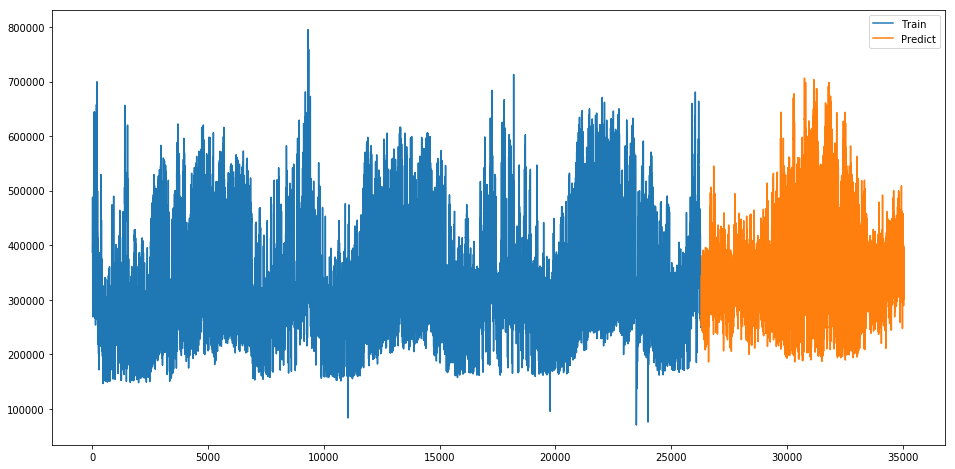

In [46]:
y_hat_avg = test[['Load_kW']]
y_hat_avg['Predict'] = y_predict
plt.figure(figsize=(16,8))

y_hat_avg = y_hat_avg.dropna()

plt.plot(train['Load_kW'], label='Train')
#plt.plot(y_hat_avg['Load_kW'], label='Test')
plt.plot(y_hat_avg['Predict'], label='Predict')
plt.legend(loc='best')
plt.show()

In [47]:
y_predict

array([269765.60549641, 271958.8235302 , 252233.72594738, ...,
       381794.00856018, 324367.04522324, 326560.26325703])

In [48]:
X_test

,Year,Month,Day,Hour,T,Accumulated Day,Day in Week,AbsT,Day0inWeek_1-2,T*Day0inWeek_1-2,...,AbsT*Day3inWeek_23-24,Day4inWeek_23-24,T*Day4inWeek_23-24,AbsT*Day4inWeek_23-24,Day5inWeek_23-24,T*Day5inWeek_23-24,AbsT*Day5inWeek_23-24,Day6inWeek_23-24,T*Day6inWeek_23-24,AbsT*Day6inWeek_23-24
26304,2005,1,1,1,52.0,1097,5,22.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26305,2005,1,1,2,52.0,1097,5,22.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26306,2005,1,1,3,53.0,1097,5,21.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26307,2005,1,1,4,51.0,1097,5,23.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26308,2005,1,1,5,52.0,1097,5,22.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26309,2005,1,1,6,52.0,1097,5,22.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26310,2005,1,1,7,50.0,1097,5,24.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26311,2005,1,1,8,49.0,1097,5,25.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26312,2005,1,1,9,58.0,1097,5,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26313,2005,1,1,10,65.0,1097,5,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
train = History_Data.iloc[17520:26304,:]
y_predict_naive = train[['Load_kW']]
y_predict_naive = y_predict_naive.reset_index()

In [86]:
print(len(y_predict_linear))


8760


In [87]:
temp = pd.DataFrame(y_predict_linear, columns= ['linear'])


In [88]:
output = pd.merge(temp, y_predict_naive, left_index= True, right_index= True, how = 'outer')

In [90]:
#output = y_predict_linear*0.6 + y_predict_naive * 0.4

In [91]:
output.to_excel('Hourly loads of 2005.xlsx')